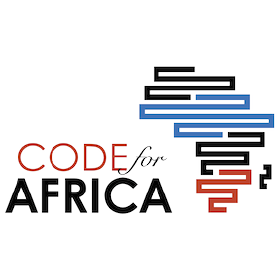

## Name : Dorcas Solonka
## Tasks : Data Collection and Data Analysis

### a) Data Collection
The data collection was done using Snscrape, for the days 8-11th of August, 2022 and tweets having the hashtag RailaTheEnigma.
Below is an image of the attributes and their descriptions when using this tool to scrape Twitter data.


**Challenges experienced;** Besides, Twint the twitter scraping tool subjecting me to debugging one error after another, I surrendered to using the tool Snscrape which was willing to return twitter data but with limited features on google collab, something I later realised had alot to do with it's compatibility to the google collab's Python. I was able to counter this by creating a virtual environment and installing all the dependencies needed then running this notebook from there.

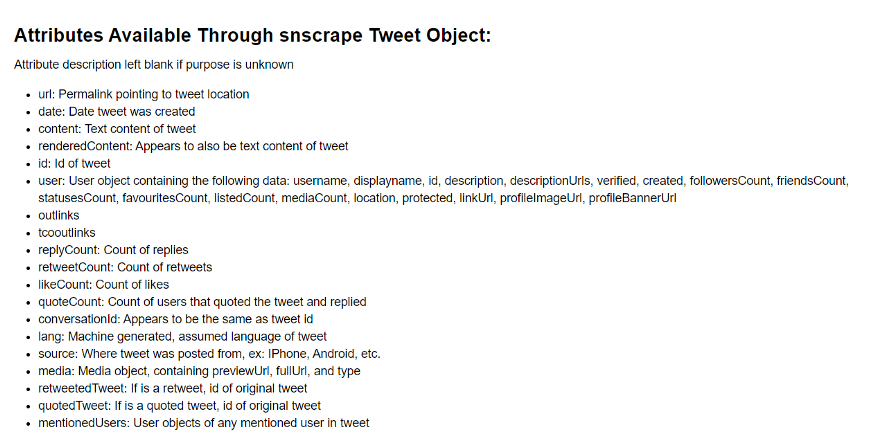

Credits: Martin Beck

In [190]:
# Imports
import os
import re
import pandas as pd
import snscrape
import snscrape.modules.twitter as sntwitter
import plotly.express as px
import matplotlib.pyplot as plt
import stylecloud
from IPython.display import Image

In [11]:
#display all dataframe columns in df
pd.options.display.max_columns = None
#display long string in datafame
pd.options.display.max_colwidth = None

In [217]:
# Creating list to append tweet data to
attributes_container = []

# Using TwitterSearchScraper to scrape data and append tweets to list
for i,tweet in enumerate(sntwitter.TwitterSearchScraper('[#RailaTheEnigma OR #railatheenigma] since:2022-08-08 until:2022-08-12').get_items()):
    
    attributes_container.append([tweet.user.id,tweet.user.username,tweet.user.displayname,tweet.user.created,tweet.user.linkUrl, tweet.date, tweet.url,tweet.content, tweet.replyCount, tweet.retweetCount, tweet.retweetedTweet, tweet.quotedTweet])
    
# Creating a dataframe to load the list
tweets_df = pd.DataFrame(attributes_container, columns=["UserID","UserHandle","UserAccountName","Account Creation Date","UserAccountURL", "Tweet Date Created", "Tweet URL", "Tweet", "QuotesCount","RetweetsCount", "RetweetedTweet", "QuotedTweet"])

In [218]:
tweets_df.head()

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet
0,1413214615283064838,ochilenny,ochilenny,2021-07-08 19:13:31+00:00,None,2022-08-11 22:42:14+00:00,https://twitter.com/ochilenny/status/1557859969218891778,@EdwinMorangaKE Is it just me who actually sang it like we used to instead of just reading it😂 haha #BabatheFifth #RailaTheEnigma #RailaOdinga,0,0,None,None
1,1326635239398105090,NoahOchenge,Noah Ochenge,2020-11-11 21:17:57+00:00,None,2022-08-11 20:44:53+00:00,https://twitter.com/NoahOchenge/status/1557830435190743041,A brave man. I'm the Bomas of Kenya he showed his strength which since then hit Uhuru till the Mountain went against him.\n\nThe fifth #RutoThe5th #RailaTheEnigma #kenyaelections2022 https://t.co/ZUACZNBCFF,0,0,None,None
2,1051973548577869824,Ammar_Kassim8,Akbas,2018-10-15 23:10:13+00:00,None,2022-08-11 20:06:38+00:00,https://twitter.com/Ammar_Kassim8/status/1557820808982044673,Mkuje KICC tusherehekee ushindi wa #RailaTheEnigma https://t.co/dPqF18YJrX,0,1,None,None
3,1495688333510561793,Gslim254,G Slim 254,2022-02-21 09:15:01+00:00,https://youtu.be/0CsrjrPjM34,2022-08-11 19:10:04+00:00,https://twitter.com/Gslim254/status/1557806575594590208,"As much as we are winning in Azimio, all influencers on both sides of the divide with big accounts should tread carefully lest they'll stir Kenyans' emotions leading to violence unintentionally. @OleItumbi\n#BabaThe5th #RailaTheEnigma #AzimioLaUmojaOneKenya #RutoMalizaUfungwe",0,0,None,None
4,1556897260310392833,NairobiUpbeatHQ,The Nairobi Upbeat,2022-08-09 06:57:24+00:00,https://bit.ly/3A7A7GI,2022-08-11 18:28:26+00:00,https://twitter.com/NairobiUpbeatHQ/status/1557796095685984256,"#TheVoteKE : Kenya Presidential Provisional results as of August 11, 2022, 9:00 PM.\n\n+++\n#NairobiUpbeat #SoPolitical #KenyaDecides2022 #RailaTheEnigma William Ruto Raila Odinga https://t.co/D82IQO4yoH",0,1,None,None


In [123]:
# saving the tweets dataframe as a csv file
tweets_df.to_csv(r'C:\Users\user\Downloads\CodeforAfrica\tweets.csv', index=False)

In [124]:
#checking the shape of the dataframe
tweets_df.shape

(980, 12)

In [125]:
#an overview of the dataframe
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   UserID                 980 non-null    int64              
 1   UserHandle             980 non-null    object             
 2   UserAccountName        980 non-null    object             
 3   Account Creation Date  980 non-null    datetime64[ns, UTC]
 4   UserAccountURL         287 non-null    object             
 5   Tweet Date Created     980 non-null    datetime64[ns, UTC]
 6   Tweet URL              980 non-null    object             
 7   Tweet                  980 non-null    object             
 8   QuotesCount            980 non-null    int64              
 9   RetweetsCount          980 non-null    int64              
 10  RetweetedTweet         0 non-null      object             
 11  QuotedTweet            47 non-null     object             

Three features have null values, UserAccountURL, RetweetedTweet and QuotedTweet. The null values in the RetweetedTweet and QuotedTweet are useful and for this reason I will not attempt to replace them.
For the null values in UserAccountURL, I will replace the null values with parts of the tweet URL that I suppose will direct me to the User Account.

In [126]:

# Displays last 5 entries from dataframe
tweets_df.tail()

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet
975,819593447598333952,kitekimichael,Michael Kiteki,2017-01-12 17:14:40+00:00,None,2022-08-08 17:10:59+00:00,https://twitter.com/kitekimichael/status/1556689442890457088,#KenyaDecides2022\n\nIt's the day!\n\nWho will carry the day?\n\nSupreme court| Joho| kakamega |Mombasa |Malala |court of appeal |Moses| Kuria |Kirinyaga |Raila |Ruto |panic |IEBC |manual register |#RailaTheEnigma |#RutoThe5th |#WajackoyahThe5th |#Mwaure| #AzimioTuesday,1,2,None,None
976,1248540357425541120,Lovielovie10,imani immah,2020-04-10 09:16:45+00:00,None,2022-08-08 16:58:57+00:00,https://twitter.com/Lovielovie10/status/1556686413197885440,"Tomorrow is the day,mission accomplish,it was a nice journey tho. Kura yangu kwa moyo mkunjufu nampa not other than #RailaTheEnigma #inawezekana forever blue 🔵",0,1,None,None
977,3411006281,meselminbar,Eyasu 🇪🇷,2015-08-09 19:40:05+00:00,None,2022-08-08 16:53:32+00:00,https://twitter.com/meselminbar/status/1556685052246953984,#BabaNaMartha Baba will be 🇰🇪s president come tomorrow. #KenyaDecides2022 #KenyansPoll #Baba51percent #RailaTheEnigma #RailaAmoloOdinga,0,0,None,None
978,1367452683662147584,ShangwejnrOffi1,@ShangwejnrOfficial✨,2021-03-04 12:31:57+00:00,None,2022-08-08 16:43:00+00:00,https://twitter.com/ShangwejnrOffi1/status/1556682399689445377,"""Raila Amolo Odinga"" #the5th #RailaAmoloOdinga #RailaTheEnigma #KenyaDecides2022 #KenyansPoll #KenyasChoice2022 #RutoMalizaUfungwe https://t.co/16MXbfGcRc",0,0,None,None
979,888281761653719042,nora_okiri,Nora Okiri,2017-07-21 06:17:30+00:00,None,2022-08-08 16:24:35+00:00,https://twitter.com/nora_okiri/status/1556677763020505089,Tomorrow we match..#firimbimovement #AzimioGrandFinale #inawezekana #BabaNaMartha #RailaTheEnigma https://t.co/bnjNBpQKgr,0,0,None,None


In [40]:
string = 'https://twitter.com/Mtukufu2_0/status/1556820104603926528'


In [41]:
regex = re.compile('(.+)status')
regex.search(string).group(1)

'https://twitter.com/Mtukufu2_0/'

In [127]:
#creating a copy of the dataframe, one whicch i will be working on
df=tweets_df.copy()

I realised that what snscrape had provided as linkURL i.e UserAccountURL were the links provided on the user profiles. To obtain the user profile link I extracted some parts of the tweetURL and this seems to work just fine. 

In [128]:
#extracting the userprofile link from the tweet URL
df['UserAccountURL']=df['Tweet URL'].str.extract('(.+)status')

In [129]:
#checking the last five entries of the dataframe
df.tail()

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet
975,819593447598333952,kitekimichael,Michael Kiteki,2017-01-12 17:14:40+00:00,https://twitter.com/kitekimichael/,2022-08-08 17:10:59+00:00,https://twitter.com/kitekimichael/status/1556689442890457088,#KenyaDecides2022\n\nIt's the day!\n\nWho will carry the day?\n\nSupreme court| Joho| kakamega |Mombasa |Malala |court of appeal |Moses| Kuria |Kirinyaga |Raila |Ruto |panic |IEBC |manual register |#RailaTheEnigma |#RutoThe5th |#WajackoyahThe5th |#Mwaure| #AzimioTuesday,1,2,None,None
976,1248540357425541120,Lovielovie10,imani immah,2020-04-10 09:16:45+00:00,https://twitter.com/Lovielovie10/,2022-08-08 16:58:57+00:00,https://twitter.com/Lovielovie10/status/1556686413197885440,"Tomorrow is the day,mission accomplish,it was a nice journey tho. Kura yangu kwa moyo mkunjufu nampa not other than #RailaTheEnigma #inawezekana forever blue 🔵",0,1,None,None
977,3411006281,meselminbar,Eyasu 🇪🇷,2015-08-09 19:40:05+00:00,https://twitter.com/meselminbar/,2022-08-08 16:53:32+00:00,https://twitter.com/meselminbar/status/1556685052246953984,#BabaNaMartha Baba will be 🇰🇪s president come tomorrow. #KenyaDecides2022 #KenyansPoll #Baba51percent #RailaTheEnigma #RailaAmoloOdinga,0,0,None,None
978,1367452683662147584,ShangwejnrOffi1,@ShangwejnrOfficial✨,2021-03-04 12:31:57+00:00,https://twitter.com/ShangwejnrOffi1/,2022-08-08 16:43:00+00:00,https://twitter.com/ShangwejnrOffi1/status/1556682399689445377,"""Raila Amolo Odinga"" #the5th #RailaAmoloOdinga #RailaTheEnigma #KenyaDecides2022 #KenyansPoll #KenyasChoice2022 #RutoMalizaUfungwe https://t.co/16MXbfGcRc",0,0,None,None
979,888281761653719042,nora_okiri,Nora Okiri,2017-07-21 06:17:30+00:00,https://twitter.com/nora_okiri/,2022-08-08 16:24:35+00:00,https://twitter.com/nora_okiri/status/1556677763020505089,Tomorrow we match..#firimbimovement #AzimioGrandFinale #inawezekana #BabaNaMartha #RailaTheEnigma https://t.co/bnjNBpQKgr,0,0,None,None


In [130]:
#an overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   UserID                 980 non-null    int64              
 1   UserHandle             980 non-null    object             
 2   UserAccountName        980 non-null    object             
 3   Account Creation Date  980 non-null    datetime64[ns, UTC]
 4   UserAccountURL         980 non-null    object             
 5   Tweet Date Created     980 non-null    datetime64[ns, UTC]
 6   Tweet URL              980 non-null    object             
 7   Tweet                  980 non-null    object             
 8   QuotesCount            980 non-null    int64              
 9   RetweetsCount          980 non-null    int64              
 10  RetweetedTweet         0 non-null      object             
 11  QuotedTweet            47 non-null     object             

Well no more null values anymore

### b) Data Analysis
Below is the data analysis that was guided by the questions provided.

**1. Total number of tweets using the hashtag?**

In [131]:
#checking the shape of the dataframe, rows & columns
df.shape

(980, 12)

There are 980 tweets using the hashtag RailaTheEnigma

**2. Develop a timeline of the tweets using showing a line graph**

In [132]:
#extracting the hour of the day each tweet was posted
df['TweetDate'] = df['Tweet Date Created'].dt.date
df.head(1)

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate
0,1413214615283064838,ochilenny,ochilenny,2021-07-08 19:13:31+00:00,https://twitter.com/ochilenny/,2022-08-11 22:42:14+00:00,https://twitter.com/ochilenny/status/1557859969218891778,@EdwinMorangaKE Is it just me who actually sang it like we used to instead of just reading it😂 haha #BabatheFifth #RailaTheEnigma #RailaOdinga,0,0,None,None,2022-08-11


In [133]:
#an overview of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   UserID                 980 non-null    int64              
 1   UserHandle             980 non-null    object             
 2   UserAccountName        980 non-null    object             
 3   Account Creation Date  980 non-null    datetime64[ns, UTC]
 4   UserAccountURL         980 non-null    object             
 5   Tweet Date Created     980 non-null    datetime64[ns, UTC]
 6   Tweet URL              980 non-null    object             
 7   Tweet                  980 non-null    object             
 8   QuotesCount            980 non-null    int64              
 9   RetweetsCount          980 non-null    int64              
 10  RetweetedTweet         0 non-null      object             
 11  QuotedTweet            47 non-null     object             

In [134]:
#checking the count of tweets on each day
df['TweetDate'].value_counts()

2022-08-09    802
2022-08-10     91
2022-08-11     68
2022-08-08     19
Name: TweetDate, dtype: int64

In [135]:
#creating a dataframe of the date feature and the count of tweets in each date
date_df = df['TweetDate'].value_counts().rename_axis('unique_values').reset_index(name='counts')
# convert to datetime
date_df['unique_values'] = pd.to_datetime(date_df['unique_values'])

In [136]:
#reordering the dates for plotting
lst = [3,0,1,2]
date_df = date_df.loc[lst]
print(date_df)

  unique_values  counts
3    2022-08-08      19
0    2022-08-09     802
1    2022-08-10      91
2    2022-08-11      68


In [137]:
date_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4 entries, 3 to 2
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   unique_values  4 non-null      datetime64[ns]
 1   counts         4 non-null      int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 96.0 bytes


In [138]:
#plotting the count of tweets in each day
fig = px.line(date_df, x="unique_values",y="counts", title='Trend of Tweets across the four days')
fig.update_xaxes(title_text='Day')
fig.update_yaxes(title_text='Count of Tweets')
fig.show()

From the line graph you notice that the twitter conversations with the hashtag RailaTheEnigma gradually increased from 19 tweets on the 8th of August hitting the peak of 802 tweets on the 9th of August, thereafter they gradually decrease with the 11th of August recording 68 tweets with the same hashtag.

**3. Identify the Account name and Account handle of the author of the first tweet that used the hashtag.**

Given that the tweets are ordered in descending order by tweetcreation date, the first tweet that used the hashtag has to be the last tweet in the event it is an original tweet.

In [139]:
df.tail()

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate
975,819593447598333952,kitekimichael,Michael Kiteki,2017-01-12 17:14:40+00:00,https://twitter.com/kitekimichael/,2022-08-08 17:10:59+00:00,https://twitter.com/kitekimichael/status/1556689442890457088,#KenyaDecides2022\n\nIt's the day!\n\nWho will carry the day?\n\nSupreme court| Joho| kakamega |Mombasa |Malala |court of appeal |Moses| Kuria |Kirinyaga |Raila |Ruto |panic |IEBC |manual register |#RailaTheEnigma |#RutoThe5th |#WajackoyahThe5th |#Mwaure| #AzimioTuesday,1,2,None,None,2022-08-08
976,1248540357425541120,Lovielovie10,imani immah,2020-04-10 09:16:45+00:00,https://twitter.com/Lovielovie10/,2022-08-08 16:58:57+00:00,https://twitter.com/Lovielovie10/status/1556686413197885440,"Tomorrow is the day,mission accomplish,it was a nice journey tho. Kura yangu kwa moyo mkunjufu nampa not other than #RailaTheEnigma #inawezekana forever blue 🔵",0,1,None,None,2022-08-08
977,3411006281,meselminbar,Eyasu 🇪🇷,2015-08-09 19:40:05+00:00,https://twitter.com/meselminbar/,2022-08-08 16:53:32+00:00,https://twitter.com/meselminbar/status/1556685052246953984,#BabaNaMartha Baba will be 🇰🇪s president come tomorrow. #KenyaDecides2022 #KenyansPoll #Baba51percent #RailaTheEnigma #RailaAmoloOdinga,0,0,None,None,2022-08-08
978,1367452683662147584,ShangwejnrOffi1,@ShangwejnrOfficial✨,2021-03-04 12:31:57+00:00,https://twitter.com/ShangwejnrOffi1/,2022-08-08 16:43:00+00:00,https://twitter.com/ShangwejnrOffi1/status/1556682399689445377,"""Raila Amolo Odinga"" #the5th #RailaAmoloOdinga #RailaTheEnigma #KenyaDecides2022 #KenyansPoll #KenyasChoice2022 #RutoMalizaUfungwe https://t.co/16MXbfGcRc",0,0,None,None,2022-08-08
979,888281761653719042,nora_okiri,Nora Okiri,2017-07-21 06:17:30+00:00,https://twitter.com/nora_okiri/,2022-08-08 16:24:35+00:00,https://twitter.com/nora_okiri/status/1556677763020505089,Tomorrow we match..#firimbimovement #AzimioGrandFinale #inawezekana #BabaNaMartha #RailaTheEnigma https://t.co/bnjNBpQKgr,0,0,None,None,2022-08-08


The last tweet is an original tweet as it is not a quoted tweet neither is it a RetweetedTweet.
Therefore the Account Name and Account Handle of the author of the first tweet using this hashtag is, Nora Okiri and nora_okiri respectively.

**4. Identify the tweet and the account that received the highest engagement(Retweets + Quotes). Output the URLs of the tweet and the account**

In [143]:
#creating a new feature 'total engagements' whhich is the sum of the count of quotes and retweets for each tweet
df['total_engagements'] = df['QuotesCount'] + df['RetweetsCount']

In [144]:
df[df['total_engagements']==df['total_engagements'].max()]

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
666,4630827141,ItsNyambane,Dennis Nyambane,2015-12-28 09:31:07+00:00,https://twitter.com/ItsNyambane/,2022-08-09 08:53:57+00:00,https://twitter.com/ItsNyambane/status/1556926746376691712,Raila Odinga is an institution. See the media 🔥 \n\n#RailaTheEnigma https://t.co/XymJpYybHQ,33,114,None,None,2022-08-09,147


The tweet that received the highest engagements is by the Account Name Dennis Nyambane whose account URL is https://twitter.com/ItsNyambane/ and the URL to the tweet itself is https://twitter.com/ItsNyambane/status/1556926746376691712

**5. Identify the top ten accounts with the highest number of original tweets(Tip: Original tweets do not include retweets or quoted tweets.**

Well, given that original tweets do not include retweets or quoted tweets yet none of the tweets in our dataframe is a retweeted tweet as the whole feature is made of null values. For this reason I will attempt to extract the tweets that are not quotedtweets only.

In [178]:
#I am not setting a condition for the retweetedtweets to be null since all of them are null
df.loc[df.QuotedTweet.isnull(), 'UserAccountName'].value_counts().head(10)#.index

Emma🇰🇪                 24
Moha                   16
𝓐𝓲𝓼𝓱𝓪 𝓜𝔀𝓪𝓶𝓾            15
The Nairobi Upbeat     15
Don Vito Corleone      14
DON SANTO🦁             14
Sarah Mutheu           14
ELECTRIKA COMPUTERS    10
kisinga                10
Dennis Nyambane        10
Name: UserAccountName, dtype: int64

The output above shows the top ten accounts by count of original tweets. The accountname EmmaKE is on the lead with 24 original tweets.

**6. Identify the top ten accounts with the highest number of retweets**

In [187]:
#Extracting the top ten samples with the highest retweets count
df.nlargest(10, 'RetweetsCount')


,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
666,4630827141,ItsNyambane,Dennis Nyambane,2015-12-28 09:31:07+00:00,https://twitter.com/ItsNyambane/,2022-08-09 08:53:57+00:00,https://twitter.com/ItsNyambane/status/1556926746376691712,Raila Odinga is an institution. See the media 🔥 \n\n#RailaTheEnigma https://t.co/XymJpYybHQ,33,114,None,None,2022-08-09,147
952,1381124219858206721,DimwitI,Dimwit Intolerant,2021-04-11 05:58:35+00:00,https://twitter.com/DimwitI/,2022-08-09 04:50:47+00:00,https://twitter.com/DimwitI/status/1556865554417336321,"EVERY VOTE FOR RAILA AMOLO ODINGA, #RailaTheEnigma ,counts. Vote. Vote. Vote. https://t.co/tLzohg5QOE",8,112,None,None,2022-08-09,120
961,1391061113450684416,042Arego_Farouq,Farouq N Boy Arego,2021-05-08 16:03:39+00:00,https://twitter.com/042Arego_Farouq/,2022-08-08 22:18:38+00:00,https://twitter.com/042Arego_Farouq/status/1556766864616955904,Reporting from Kondele..Blow the whistle 💙💙💙💙💙\n#KenyaDecides2022 #KIEMS #ManualRegister #TukoWengi #RailaTheEnigma #Bomet #KenyansPoll #Eldas #Bomet https://t.co/iNRvHb4oun,12,69,None,None,2022-08-08,81
383,817259084,TheODMparty,The ODM Party,2012-09-11 11:45:26+00:00,https://twitter.com/TheODMparty/,2022-08-09 10:39:00+00:00,https://twitter.com/TheODMparty/status/1556953184597426180,This is how PL ⁦@RailaOdinga⁩ was celebrated by jubilant wananchi moments after casting his vote at the Old Kibera Primary School in Kibra Constituency today #RailaTheEnigma https://t.co/umuoOEyCBn,19,68,None,None,2022-08-09,87
591,34962084,wesrono,CiTi Tiger,2009-04-24 16:02:12+00:00,https://twitter.com/wesrono/,2022-08-09 09:12:05+00:00,https://twitter.com/wesrono/status/1556931312526704640,The turn out is massive..\n\nTuko hapa Ruiru..\n\nWilliam RUTO is taking this thing by 8pm\n\nRigathi Gachagua Chebukati Gatundu South #RailaTheEnigma https://t.co/BEWzuFhNa9,66,65,None,None,2022-08-09,131
746,965552194882867200,FrankMtetezi,Frank Mtetezi (ʙᴀꜰ)🗨️🇰🇪,2018-02-19 11:42:37+00:00,https://twitter.com/FrankMtetezi/,2022-08-09 08:30:52+00:00,https://twitter.com/FrankMtetezi/status/1556920939803299840,"The 5 TH Hon Raila Odinga has already voted at old kibra Primary School , The Love the expectations the reality and the dream is here to be realized , His supporters have waited long overdue, Finally we say Congratulations Baba 💪💥🔨 #RailaTheEnigma https://t.co/IMpXsUKRXS",11,64,None,None,2022-08-09,75
413,1398740936,ItsOmaido,Jonan Czar Omaido 🇰🇪,2013-05-03 03:24:42+00:00,https://twitter.com/ItsOmaido/,2022-08-09 10:17:19+00:00,https://twitter.com/ItsOmaido/status/1556947727602389000,Kibra residents blocked my President Raila Odinga to confirm to him they have already casted their votes in his favor. #teamblue\n #ElectionsKE Gatundu south Rigathi gachagua Nyeri #RailaTheEnigma Uganda https://t.co/aZZdRFX4qN,18,59,None,None,2022-08-09,77
852,613338050,vee_wandera,Vivianne,2012-06-20 10:50:21+00:00,https://twitter.com/vee_wandera/,2022-08-09 07:48:15+00:00,https://twitter.com/vee_wandera/status/1556910211402809345,Raila Odinga Arrives at Old Kibra Primary school to vote #KenyaDecides #KenyaDecides #KenyaDecides2022 #RailaTheEnigma #Raila https://t.co/7XkaXAFU2u,24,48,None,None,2022-08-09,72
828,1091028921477464064,Daktari_Muli,Dr Muli,2019-01-31 17:42:20+00:00,https://twitter.com/Daktari_Muli/,2022-08-09 08:01:51+00:00,https://twitter.com/Daktari_Muli/status/1556913636056211456,I didn't vote for peace. I voted for Raila Amolo Odinga in peace. \nNow I have peace of mind.\n#KenyaDecides2022 \n#RailaTheEnigma https://t.co/dkkZ47BnVM,6,41,None,None,2022-08-09,47
560,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-09 09:20:52+00:00,https://twitter.com/Moha87574655/status/1556933518961397760,"#ElectionsKE \nWhere is the DO Gachagua, you have a missed call here! \n#RailaTheEnigma https://t.co/i

In [188]:
#extracting only the account names of these top retweets
f=df.nlargest(10, 'RetweetsCount')
print(f.UserAccountName)

666            Dennis Nyambane
952          Dimwit Intolerant
961         Farouq N Boy Arego
383              The ODM Party
591                 CiTi Tiger
746    Frank Mtetezi (ʙᴀꜰ)🗨️🇰🇪
413       Jonan Czar Omaido 🇰🇪
852                   Vivianne
828                    Dr Muli
560                       Moha
Name: UserAccountName, dtype: object


The output above represents the top 10 accounts with the highest number of retweets, ordered in descending order, whereby the account name Dennis Nyambane is leading with 114 retweets count.

**7. Develop a wordcloud of the tweets and identify the top 10 keywords used within the hashtag. What are the key themes and narratives you can derive from the word cloud?**

In [194]:
#creating a string of all the words in the tweets feature, to be used in generating the wordcloud
general=" ".join([i for i in df['Tweet'].str.upper()])

In [209]:
#generating the wordcloud as a png file called general, with the following custom stop words 'RAILATHEENIGMA','AND','IN','TO','THE','OF','T','A','CO','FOR'
stylecloud.gen_stylecloud(general, icon_name= "fab fa-twitter", background_color='white',gradient='horizontal', stopwords = True,custom_stopwords=['RAILATHEENIGMA','AND','IN','TO','THE','OF','T','A','CO','FOR'],output_name = 'general.png')  

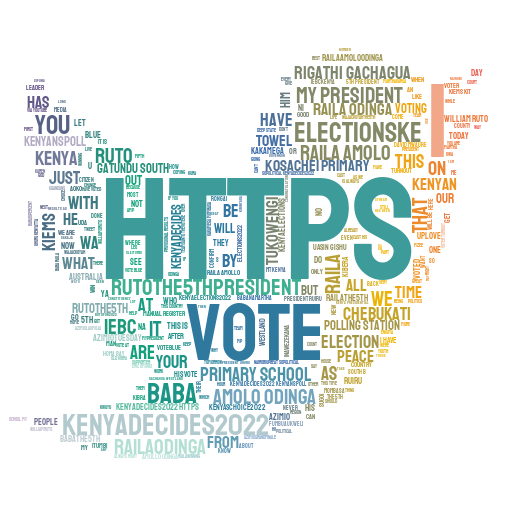

In [210]:
Image('general.png')

The top ten words from the word cloud visualization, include but not limited to the following;
 1. HTTPS
 2. KENYADECIDES2022
 3. ELECTIONSKE
 4. I
 5. YOU
 6. VOTE
 7. RUTOTHEFIFTHPRESIDENT
 8. RAILAODINGA
 9. RUTO
 10. MYPRESIDENT
 
The key themes and narratives that can be derived from the word cloud visualization include;
* The conversation surround the Kenyan General election held on August 9th, 2022.
* The conversations are in the first and second person context, indicated by the words, I and You. This could be a pointer to conversations with direct feedback from users.
* There seem to be alot of link URLS sharing among the tweets.
* The conversations seem to touch mostly on the two main presidential candidates in the Kenyan election, Raila and Ruto.

**8. Using Gephi , or any other social network visualization tool/package, visualize the network and identify key accounts and clusters that spearheaded this hashtag**
**9. From your assessment, were there any accounts that worked in a coordinated way to push this hashtag?**

This was quite the challenge for me. Spent the whole of today(19/8/2022) learning about the dynamics around Social Network Analysis using Gephi, SocioViz and NetworkX. I realised that for Gephi one can use live twitter data or one that is 7 or less days old which for this case study was beyond the timeline, this was the case even for SocioViz. Well there was an option of creating the source targets for network analysis but then I didn't have clear targets like mentioned users within a tweet. This features would have been readily available had I used Twint or Tweepy. Tweepy had the one week old tweets limitations disqualifying its use for this particular task while Twint wasn't kind to me in the sense that trying to use it subjected me into solving one error after another until I resorted to using snscrape which wasn't as collaborative at first but in the end it is the only one that worked for me this far.
It's for this reason that I am not able to answer this question even though I am grateful for the challenge as it has forced me to learn new things that I wasn't aware of. I also acknowledge that I could be missing something on this specific question in that, there could be an approach that would've come in handy  had I known. For this reason, I would really appreciate advice on the same matter.

**Below are my personal explorations when trying to manually identify a fake twitter account from the data**

In [202]:
#checking the count of unique user IDs among the extracted tweets
df.UserID.nunique()

612

In [219]:
#checking the top twenty account names with regards to count of tweets posted by each
df.UserAccountName.value_counts().head(20)

Emma🇰🇪                 24
Moha                   17
The Nairobi Upbeat     15
𝓐𝓲𝓼𝓱𝓪 𝓜𝔀𝓪𝓶𝓾            15
Sarah Mutheu           14
Don Vito Corleone      14
DON SANTO🦁             14
kisinga                12
ELECTRIKA COMPUTERS    10
Dennis Nyambane        10
Mueni Ngumbau.          7
Nairobi Pund!t🇰🇪        7
Teko_Wole 🇰🇪            6
KENYA                   6
Crazy Kisumian          6
izak ngara              6
JamesKE🇰🇪               5
T3                      5
Anne                    5
Samko Autos             5
Name: UserAccountName, dtype: int64

In [207]:
#viewing all the tweets by account name EmmaKE
p=df[df['UserAccountName']=='Emma🇰🇪']

In [208]:
p

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
268,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 12:30:39+00:00,https://twitter.com/Majaliwa98/status/1556981283120713731,"Today's voter turnout in Mt Kenya is wanting, Ruto's strong holds are down. #RailaTheEnigma #KenyansPoll #KenyaDecides2022 https://t.co/3POVZJONvZ",0,1,None,None,2022-08-09,1
315,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 11:35:47+00:00,https://twitter.com/Majaliwa98/status/1556967475392159750,"This journey is unstoppable, this is a great one 🔥🔥🔥💙 #RailaTheEnigma https://t.co/GR6RQPruTm",0,0,None,None,2022-08-09,0
319,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 11:25:35+00:00,https://twitter.com/Majaliwa98/status/1556964908520116224,HON. RAILA AMOLO ODINGA\n\nTHE Commander in Chief #RailaTheEnigma https://t.co/uIzGz4Nwa3,0,0,None,None,2022-08-09,0
323,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 11:20:44+00:00,https://twitter.com/Majaliwa98/status/1556963686228582401,"Kateni miti sugoi, huyo mtoto atajinyonga🤣🤣 #RailaTheEnigma https://t.co/ntlpW5O3tx",0,0,None,None,2022-08-09,0
352,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:58:19+00:00,https://twitter.com/Majaliwa98/status/1556958044935917570,"Mt Kenya watu wako rada sana, #RailaTheEnigma is making it happen on the ground. https://t.co/ThGex6wxpP",0,0,None,None,2022-08-09,0
354,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:56:42+00:00,https://twitter.com/Majaliwa98/status/1556957639334043648,"Hii ndo form, the day is well executed and established. #RailaTheEnigma https://t.co/NP7MAkJn3V",0,0,None,None,2022-08-09,0
359,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:51:43+00:00,https://twitter.com/Majaliwa98/status/1556956385295753216,"@TheODMparty @RailaOdinga This was great, the turn out was also great, this time round it's #RailaTheEnigma",0,0,None,None,2022-08-09,0
375,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:42:22+00:00,https://twitter.com/Majaliwa98/status/1556954029925830658,Mt Kenya will be the biggest disappointed to Ruto. #RailaTheEnigma\nhttps://t.co/BTNEqO0LS9,0,0,None,None,2022-08-09,0
379,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:41:02+00:00,https://twitter.com/Majaliwa98/status/1556953697179078656,Mt Kenya voters refuse to turn up for voting which is Ruto's strong holds. #RailaTheEnigma\nhttps://t.co/BTNEqO0LS9,0,0,None,None,2022-08-09,0
405,1392427683078934528,Majaliwa98,Emma🇰🇪,2021-05-12 10:33:53+00:00,https://twitter.com/Majaliwa98/,2022-08-09 10:24:16+00:00,https://twitter.com/Majaliwa98/status/1556949474240503809,"I need this one to my office, my president from today. #RailaTheEnigma https://t.co/JdL0cJ9CK9",1,0,None,None,2022-08-09,1


In [220]:
#viewing all the tweets by Moha
df[df['UserAccountName']=='Moha']

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
48,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-11 06:25:03+00:00,https://twitter.com/Moha87574655/status/1557614050707738626,"I hear Waiguru is being shown by Ngirici why kirinyaga isn't NYS! \nSifuna, Ngilu, Kenneth, miguna, duale, Wetangula \n#KenyaDecides2022 \n#RailaTheEnigma \n#railathe5th https://t.co/Ov0OJdS7hq",0,0,None,None,2022-08-11,0
106,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 14:19:24+00:00,https://twitter.com/Moha87574655/status/1557371036055879680,#KenyaDecides \n#RailaTheEnigma\n#TukoWengi\nDavid Ndii did his tally based on Itumbi's lies and now he is calling fir help from hustlers! \nHow on earth do you dispute an election consultant who a live tallying centre on FB? \nHii ni hujuma! \n😂😂😂 https://t.co/Rh4I7Uw7yI,0,0,None,None,2022-08-10,0
112,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 12:35:01+00:00,https://twitter.com/Moha87574655/status/1557344769738670080,"#KenyaDecides \n#RailaTheEnigma \nUfisadi daima alliance (UDA) elections results starter pack! \nSifuna, Alai, Passaris, Igathe, Sabina Chege\n#TukoWengi https://t.co/Jx5SgIurrS",0,0,None,None,2022-08-10,0
117,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 12:10:54+00:00,https://twitter.com/Moha87574655/status/1557338700488507394,"#KenyaDecides \n#RailaTheEnigma \n#AZIMIOGRANDFINALE \nUfisadi daima alliance (UDA) should just switch off the TV and pray for Ruto! \nSifuna, Wanga, sabina Chege https://t.co/WLpxVOSHaY",0,1,None,None,2022-08-10,1
119,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 11:43:19+00:00,https://twitter.com/Moha87574655/status/1557331756109467651,"#KenyaDecides \n#RailaTheEnigma \n#AZIMIOGRANDFINALE \nNdii has been bragging how he is the smartest economist in East and Central Africa only for him to tally Ruto's votes based the upuzi Itumbi has been posting all night! \n😂😂\nSifuna, Sabina Chege, Alai, Martha Karua, Wanga https://t.co/A5woJmzn6y",0,1,None,None,2022-08-10,1
121,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 11:02:01+00:00,https://twitter.com/Moha87574655/status/1557321363437850625,#kenyaelections2022\nNairobi voters told Milicent Omanga to fully exploit her tweaking skills because their preferred women rep is Esther Passaris! \nCongratulations Passaris! \n#TukoWengi \n#RailaTheEnigma https://t.co/827RceUqXZ,0,0,None,None,2022-08-10,0
130,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 10:25:55+00:00,https://twitter.com/Moha87574655/status/1557312280919941120,"#kenyaelections2022\nHola National irrigation board (HNIB) is still preparing to live stream Ruto's concession speech! \nWanga, Igathe, Sabina Chege, FORM 34A, Dismus Barasa, Itumbi \n#RailaTheEnigma \n#TukoWengi \n#AZIMIOGRANDFINALE https://t.co/4VQ0Zm98ll",1,2,None,None,2022-08-10,3
133,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 10:04:32+00:00,https://twitter.com/Moha87574655/status/1557306897920925696,DON'T deactivate your twitter accounts as Kenyans have questions for you which need answers! \n#TukoWengi \n#RailaTheEnigma \n#AZIMIOGRANDFINALE,0,0,None,None,2022-08-10,0
140,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-10 09:07:31+00:00,https://twitter.com/Moha87574655/status/1557292548254752768,"#kenyaelections2022 \nAll Ufisadi daima alliance (UDA) fake pollsters right now! \nYou had declared Ruto the 5th president las

In [221]:
#viewing the first ten entries
df.head(10)

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
0,1413214615283064838,ochilenny,ochilenny,2021-07-08 19:13:31+00:00,https://twitter.com/ochilenny/,2022-08-11 22:42:14+00:00,https://twitter.com/ochilenny/status/1557859969218891778,@EdwinMorangaKE Is it just me who actually sang it like we used to instead of just reading it😂 haha #BabatheFifth #RailaTheEnigma #RailaOdinga,0,0,None,None,2022-08-11,0
1,1326635239398105090,NoahOchenge,Noah Ochenge,2020-11-11 21:17:57+00:00,https://twitter.com/NoahOchenge/,2022-08-11 20:44:53+00:00,https://twitter.com/NoahOchenge/status/1557830435190743041,A brave man. I'm the Bomas of Kenya he showed his strength which since then hit Uhuru till the Mountain went against him.\n\nThe fifth #RutoThe5th #RailaTheEnigma #kenyaelections2022 https://t.co/ZUACZNBCFF,0,0,None,None,2022-08-11,0
2,1051973548577869824,Ammar_Kassim8,Akbas,2018-10-15 23:10:13+00:00,https://twitter.com/Ammar_Kassim8/,2022-08-11 20:06:38+00:00,https://twitter.com/Ammar_Kassim8/status/1557820808982044673,Mkuje KICC tusherehekee ushindi wa #RailaTheEnigma https://t.co/dPqF18YJrX,0,1,None,None,2022-08-11,1
3,1495688333510561793,Gslim254,G Slim 254,2022-02-21 09:15:01+00:00,https://twitter.com/Gslim254/,2022-08-11 19:10:04+00:00,https://twitter.com/Gslim254/status/1557806575594590208,"As much as we are winning in Azimio, all influencers on both sides of the divide with big accounts should tread carefully lest they'll stir Kenyans' emotions leading to violence unintentionally. @OleItumbi\n#BabaThe5th #RailaTheEnigma #AzimioLaUmojaOneKenya #RutoMalizaUfungwe",0,0,None,None,2022-08-11,0
4,1556897260310392833,NairobiUpbeatHQ,The Nairobi Upbeat,2022-08-09 06:57:24+00:00,https://twitter.com/NairobiUpbeatHQ/,2022-08-11 18:28:26+00:00,https://twitter.com/NairobiUpbeatHQ/status/1557796095685984256,"#TheVoteKE : Kenya Presidential Provisional results as of August 11, 2022, 9:00 PM.\n\n+++\n#NairobiUpbeat #SoPolitical #KenyaDecides2022 #RailaTheEnigma William Ruto Raila Odinga https://t.co/D82IQO4yoH",0,1,None,None,2022-08-11,1
5,194118983,BabudiWaRuheni,mjukuu wa maasai,2010-09-23 13:41:15+00:00,https://twitter.com/BabudiWaRuheni/,2022-08-11 17:57:16+00:00,https://twitter.com/BabudiWaRuheni/status/1557788253436006401,They remind me of Hugo Chavez and Nicolas Maduro...hence the worry......Kenya deserves #RailaTheEnigma more than ever! #KenyansDecides2022,0,0,None,None,2022-08-11,0
6,959035016755007491,nd1ema002,Wangùù Wa Makeri,2018-02-01 12:05:40+00:00,https://twitter.com/nd1ema002/,2022-08-11 17:42:09+00:00,https://twitter.com/nd1ema002/status/1557784449991208965,"For the first time in history, voter turn out in Central Kenya was at the lowest in the 2022 at 55%. That is why it's hard for William Ruto to win this election. Numbers aren't adding up. #RailaTheEnigma #KenyansDecides2022 https://t.co/TplR9HTj0q",0,0,None,None,2022-08-11,0
7,2763791697,bravogarcia5,Sina Maoni🍁🔥🇰🇪,2014-09-07 09:24:06+00:00,https://twitter.com/bravogarcia5/,2022-08-11 17:30:14+00:00,https://twitter.com/bravogarcia5/status/1557781451277574146,IEBC have decided to prove us wrong from mambo ni mengi muda ni mchache to mambo ni machache muda ndo mwingi🤣🤣🤣\n\n#railathe5th #RailaTheEnigma,0,0,None,None,2022-08-11,0
8,2208838478,Bamphill,Chemphil The Brand,2013-11-22 11:44:01+00:00,https://twitter.com/Bamphill/,2022-08-11 17:09:22+00:00,https://twitter.com/Bamphill/status/1557776198993952770,"@ItsMutai But I thought MDVD was bought and Wetangula was given out for free?.\nAnd by the look of things, it's like MDVD is the one given for free because papa wa Roma has delivered.\n#williamruto\n#RailaTheEnigma\n#kirinyaga",0,0,None,None,2022-08-11,0
9,3226467352,MoseMayor,Boniface Mose,2015-05-01 16:19:50+00:00,https://twitter.com/MoseMayor/,2022-08-11 16:41:00+00:00,https://twitter.com/MoseMayor/status/1557769058178695169,Meanwhile Itumbi was

In [222]:
#viewing the last ten entries
df.tail(10)

,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
970,888281761653719042,nora_okiri,Nora Okiri,2017-07-21 06:17:30+00:00,https://twitter.com/nora_okiri/,2022-08-08 19:40:17+00:00,https://twitter.com/nora_okiri/status/1556727013347672067,Our neighborhood is blue #AzimioGrandFinale #BabaNaMartha #Baba51percent #RailaTheEnigma #VoteBlue https://t.co/DDaJp5CIWv,0,10,None,None,2022-08-08,10
971,1245742171,Bandit_Ke,B@nd!+,2013-03-06 10:00:56+00:00,https://twitter.com/Bandit_Ke/,2022-08-08 18:59:20+00:00,https://twitter.com/Bandit_Ke/status/1556716709129719808,As u vote tomorrow don't forget those close to you are your kin just as this servants of ours are. Vote enda home let the constitution work #peacefulElections #RutoThe5th #RailaTheEnigma #KenyaDecides2022 https://t.co/tjE14Urwod,0,1,None,None,2022-08-08,1
972,832187196723576832,PhenestOchieng,Stephen Ochieng🇰🇪,2017-02-16 11:17:43+00:00,https://twitter.com/PhenestOchieng/,2022-08-08 17:46:39+00:00,https://twitter.com/PhenestOchieng/status/1556698418864586757,Let's all come out and Vote in Agwas aka Agwambo aka Tinga aka Jakom aka Nyundo aka Baba Raila Amolo Odinga as the 5th President of Kenya\n\n#Baba51percent #RailaTheEnigma #KenyasChoice2022 #KenyaDecides2022 https://t.co/XXLEM1FnG6,0,0,None,None,2022-08-08,0
973,877769887573213189,idrismaalimlaw,Idris Maalim,2017-06-22 06:07:04+00:00,https://twitter.com/idrismaalimlaw/,2022-08-08 17:35:28+00:00,https://twitter.com/idrismaalimlaw/status/1556695603366793216,It has been established both scientifically and mathematically that it is impossible for #RailaTheEnigma to loose the Presidential #Elections2022 come tomorrow. #KenyaDecides2022 https://t.co/yxh8dZL9U8,2,13,None,None,2022-08-08,15
974,399880991,GabrielBuule,Gabriel Buule,2011-10-28 05:36:00+00:00,https://twitter.com/GabrielBuule/,2022-08-08 17:20:51+00:00,https://twitter.com/GabrielBuule/status/1556691926560260097,@francis_isano #RailaTheEnigma ✌️❣️,0,0,None,None,2022-08-08,0
975,819593447598333952,kitekimichael,Michael Kiteki,2017-01-12 17:14:40+00:00,https://twitter.com/kitekimichael/,2022-08-08 17:10:59+00:00,https://twitter.com/kitekimichael/status/1556689442890457088,#KenyaDecides2022\n\nIt's the day!\n\nWho will carry the day?\n\nSupreme court| Joho| kakamega |Mombasa |Malala |court of appeal |Moses| Kuria |Kirinyaga |Raila |Ruto |panic |IEBC |manual register |#RailaTheEnigma |#RutoThe5th |#WajackoyahThe5th |#Mwaure| #AzimioTuesday,1,2,None,None,2022-08-08,3
976,1248540357425541120,Lovielovie10,imani immah,2020-04-10 09:16:45+00:00,https://twitter.com/Lovielovie10/,2022-08-08 16:58:57+00:00,https://twitter.com/Lovielovie10/status/1556686413197885440,"Tomorrow is the day,mission accomplish,it was a nice journey tho. Kura yangu kwa moyo mkunjufu nampa not other than #RailaTheEnigma #inawezekana forever blue 🔵",0,1,None,None,2022-08-08,1
977,3411006281,meselminbar,Eyasu 🇪🇷,2015-08-09 19:40:05+00:00,https://twitter.com/meselminbar/,2022-08-08 16:53:32+00:00,https://twitter.com/meselminbar/status/1556685052246953984,#BabaNaMartha Baba will be 🇰🇪s president come tomorrow. #KenyaDecides2022 #KenyansPoll #Baba51percent #RailaTheEnigma #RailaAmoloOdinga,0,0,None,None,2022-08-08,0
978,1367452683662147584,ShangwejnrOffi1,@ShangwejnrOfficial✨,2021-03-04 12:31:57+00:00,https://twitter.com/ShangwejnrOffi1/,2022-08-08 16:43:00+00:00,https://twitter.com/ShangwejnrOffi1/status/1556682399689445377,"""Raila Amolo Odinga"" #the5th #RailaAmoloOdinga #RailaTheEnigma #KenyaDecides2022 #KenyansPoll #KenyasChoice2022 #RutoMalizaUfungwe https://t.co/16MXbfGcRc",0,0,None,None,2022-08-08,0
979,888281761653719042,nora_okiri,Nora Okiri,2017-07-21 06:17:30+00:00,https://twitter.com/nora_okiri/,2022-08-08 16:24:35+00:00,https://twitter.com/nora_okiri/status/1556677763020505089,Tomorrow we match..#firimbimovement #AzimioGrandFinale #inawezekana #BabaNaMartha #Rai

In [223]:
#viewing the top ten most retweeted accounts
df.nlargest(10, 'RetweetsCount')


,UserID,UserHandle,UserAccountName,Account Creation Date,UserAccountURL,Tweet Date Created,Tweet URL,Tweet,QuotesCount,RetweetsCount,RetweetedTweet,QuotedTweet,TweetDate,total_engagements
666,4630827141,ItsNyambane,Dennis Nyambane,2015-12-28 09:31:07+00:00,https://twitter.com/ItsNyambane/,2022-08-09 08:53:57+00:00,https://twitter.com/ItsNyambane/status/1556926746376691712,Raila Odinga is an institution. See the media 🔥 \n\n#RailaTheEnigma https://t.co/XymJpYybHQ,33,114,None,None,2022-08-09,147
952,1381124219858206721,DimwitI,Dimwit Intolerant,2021-04-11 05:58:35+00:00,https://twitter.com/DimwitI/,2022-08-09 04:50:47+00:00,https://twitter.com/DimwitI/status/1556865554417336321,"EVERY VOTE FOR RAILA AMOLO ODINGA, #RailaTheEnigma ,counts. Vote. Vote. Vote. https://t.co/tLzohg5QOE",8,112,None,None,2022-08-09,120
961,1391061113450684416,042Arego_Farouq,Farouq N Boy Arego,2021-05-08 16:03:39+00:00,https://twitter.com/042Arego_Farouq/,2022-08-08 22:18:38+00:00,https://twitter.com/042Arego_Farouq/status/1556766864616955904,Reporting from Kondele..Blow the whistle 💙💙💙💙💙\n#KenyaDecides2022 #KIEMS #ManualRegister #TukoWengi #RailaTheEnigma #Bomet #KenyansPoll #Eldas #Bomet https://t.co/iNRvHb4oun,12,69,None,None,2022-08-08,81
383,817259084,TheODMparty,The ODM Party,2012-09-11 11:45:26+00:00,https://twitter.com/TheODMparty/,2022-08-09 10:39:00+00:00,https://twitter.com/TheODMparty/status/1556953184597426180,This is how PL ⁦@RailaOdinga⁩ was celebrated by jubilant wananchi moments after casting his vote at the Old Kibera Primary School in Kibra Constituency today #RailaTheEnigma https://t.co/umuoOEyCBn,19,68,None,None,2022-08-09,87
591,34962084,wesrono,CiTi Tiger,2009-04-24 16:02:12+00:00,https://twitter.com/wesrono/,2022-08-09 09:12:05+00:00,https://twitter.com/wesrono/status/1556931312526704640,The turn out is massive..\n\nTuko hapa Ruiru..\n\nWilliam RUTO is taking this thing by 8pm\n\nRigathi Gachagua Chebukati Gatundu South #RailaTheEnigma https://t.co/BEWzuFhNa9,66,65,None,None,2022-08-09,131
746,965552194882867200,FrankMtetezi,Frank Mtetezi (ʙᴀꜰ)🗨️🇰🇪,2018-02-19 11:42:37+00:00,https://twitter.com/FrankMtetezi/,2022-08-09 08:30:52+00:00,https://twitter.com/FrankMtetezi/status/1556920939803299840,"The 5 TH Hon Raila Odinga has already voted at old kibra Primary School , The Love the expectations the reality and the dream is here to be realized , His supporters have waited long overdue, Finally we say Congratulations Baba 💪💥🔨 #RailaTheEnigma https://t.co/IMpXsUKRXS",11,64,None,None,2022-08-09,75
413,1398740936,ItsOmaido,Jonan Czar Omaido 🇰🇪,2013-05-03 03:24:42+00:00,https://twitter.com/ItsOmaido/,2022-08-09 10:17:19+00:00,https://twitter.com/ItsOmaido/status/1556947727602389000,Kibra residents blocked my President Raila Odinga to confirm to him they have already casted their votes in his favor. #teamblue\n #ElectionsKE Gatundu south Rigathi gachagua Nyeri #RailaTheEnigma Uganda https://t.co/aZZdRFX4qN,18,59,None,None,2022-08-09,77
852,613338050,vee_wandera,Vivianne,2012-06-20 10:50:21+00:00,https://twitter.com/vee_wandera/,2022-08-09 07:48:15+00:00,https://twitter.com/vee_wandera/status/1556910211402809345,Raila Odinga Arrives at Old Kibra Primary school to vote #KenyaDecides #KenyaDecides #KenyaDecides2022 #RailaTheEnigma #Raila https://t.co/7XkaXAFU2u,24,48,None,None,2022-08-09,72
828,1091028921477464064,Daktari_Muli,Dr Muli,2019-01-31 17:42:20+00:00,https://twitter.com/Daktari_Muli/,2022-08-09 08:01:51+00:00,https://twitter.com/Daktari_Muli/status/1556913636056211456,I didn't vote for peace. I voted for Raila Amolo Odinga in peace. \nNow I have peace of mind.\n#KenyaDecides2022 \n#RailaTheEnigma https://t.co/dkkZ47BnVM,6,41,None,None,2022-08-09,47
560,1284689661940633603,Moha87574655,Moha,2020-07-19 03:21:30+00:00,https://twitter.com/Moha87574655/,2022-08-09 09:20:52+00:00,https://twitter.com/Moha87574655/status/1556933518961397760,"#ElectionsKE \nWhere is the DO Gachagua, you have a missed call here! \n#RailaTheEnigma https://t.co/i